In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import process_SMHI_data as process_data
import meteorological_temporal_data as metdata
import seaborn as sns

# Read in and clean data

In [3]:
# def a plot function
def plot_function(df, rows, cols, fig_size,  y_labels, fig_path = None, savefig = False):
    fig, axes = plt.subplots(rows, cols, constrained_layout = True, figsize = fig_size)
    annots = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(i)', '(j)']

    j = 0
    for i, ax in enumerate(fig.axes):
        df.iloc[:, j].plot(ax = ax, linewidth = .85) # linewidth default = 1.5
        ax.set_ylabel(y_labels)
        ax.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=2, borderaxespad=0.1)
        ax.annotate(annots[i], xy=(0.0, 1.09), xycoords="axes fraction")
        ax.set_xlabel('')
        j += 1
    if savefig:
        plt.savefig(fig_path)

In [4]:
# read in data and clean with import script
df = process_data.clean_and_merge_dframes('../air_weather_data/NOx/')

In [5]:
# stations was misspelled in SMHI data
df.rename(columns={'NO$_x$, Stockholm Torkel Knutssongatan':'NO$_x$, Stockholm Torkel Knutssonsgatan'}, 
               inplace=True)

In [6]:
df.describe().round(3)

,"NOX as NO2, Stockholm Torkel Knutssongatan","NOX as NO2, Stockholm Sveavägen 59 Tak","NOX as NO2, Botkyrka Hågelbyleden","NOX as NO2, Norr Malma","NOX as NO2, Stockholm E4/E20 Lilla Essingen","NOX as NO2, Sollentuna E4 Häggvik","NOX as NO2, Stockholm Sveavägen 59","NOX as NO2, Stockholm Hornsgatan 108"
count,60830.000,59959.000,59392.000,60799.000,58503.000,51626.000,60800.000,60740.000
mean,13.262,16.005,28.091,2.901,68.565,51.663,56.648,79.981
std,15.671,15.461,44.273,2.616,60.841,60.472,59.130,77.225
min,0.500,-0.500,0.300,-0.600,1.000,0.300,0.100,0.009
25%,5.500,7.100,8.000,1.440,27.400,14.300,17.900,26.400
50%,8.800,11.900,16.200,2.250,51.900,31.800,37.000,56.000
75%,15.300,19.700,31.100,3.500,90.400,65.400,73.400,107.400
max,647.000,364.400,1211.400,63.700,926.800,1106.700,982.500,1324.000


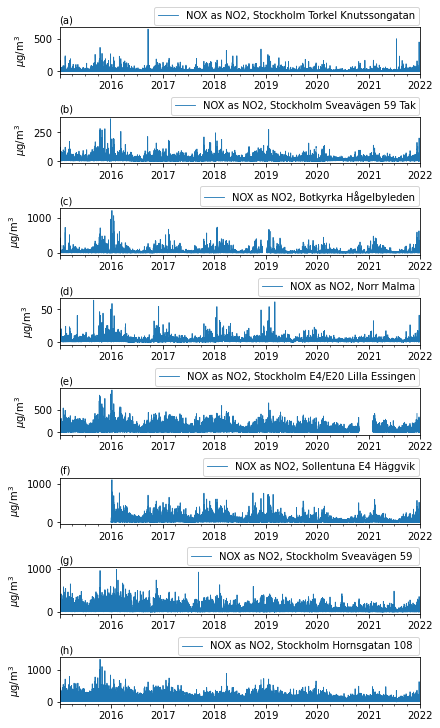

In [7]:
# plot raw PM10 data
plot_function(df, 8, 1, fig_size=(6,10), y_labels='$\mu$g/m$^3$')

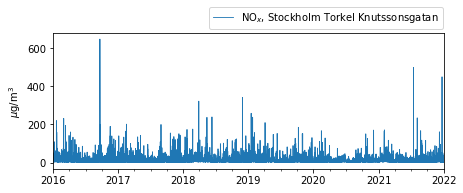

In [7]:
# plot only Torkel Knutssonsgatan station data
df['NO$_x$, Stockholm Torkel Knutssonsgatan']['2016-01-01 00:00:00':].plot(linewidth=.85, figsize=(7,2.5))
plt.ylabel('$\mu$g/m$^3$'), plt.xlabel('')
plt.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=2, borderaxespad=0.1)

In [17]:
# check zero or outlier values
np.sum(df <0) 

NO$_x$, Stockholm Torkel Knutssonsgatan     0
NO$_x$, Stockholm Sveavägen 59 Tak          3
NO$_x$, Botkyrka Hågelbyleden               0
NO$_x$, Norr Malma                         17
NO$_x$, Stockholm E4/E20 Lilla Essingen     0
NO$_x$, Sollentuna E4 Häggvik               0
NO$_x$, Stockholm Sveavägen 59              0
NO$_x$, Stockholm Hornsgatan 108            0
dtype: int64

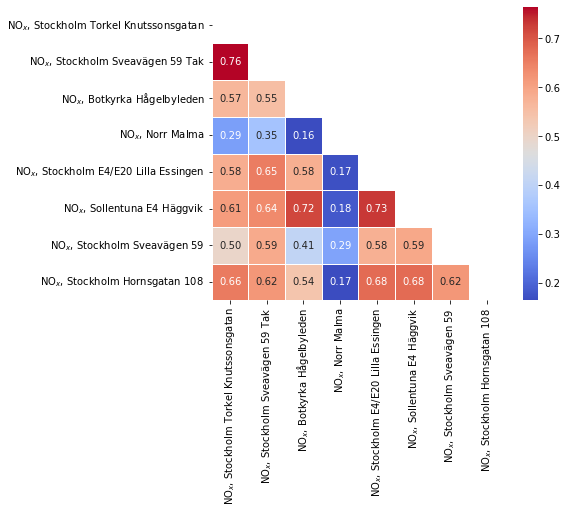

In [13]:
mat = df.corr()
mask = np.triu(np.ones_like(mat, dtype=bool))
fig, ax = plt.subplots(figsize = (8,7), constrained_layout = True)
ax = sns.heatmap(mat, mask=mask, annot = True, linewidths=0.5, fmt = ".2f", square=True, cmap='coolwarm')

In [14]:
# save cleaned dataframe
df.to_csv('../air_weather_data/NOx_all_stations_cleaned.csv')